# Chapter Six - Simulating Compartmental models 

**Background**: Many systems that describe the spread of an infectious agent through a population can be summarized by a compartmental model. 
Compartmental models assign individuals in a population to one of a finite number of disease states. 
For example, the SIR model assigns individuals to the states: Susceptible, Infectious, Removed (no longer able to be susceptible or infected). 

We will explore how ordinary differential equations (ODEs) can be used to model the movement of animals through disease states over time. 

**Goal**: To simulate and explore dynamical systems that estimate the number (or proportion) of animals in one of a finite number of disease states.

## SIR model

The **SIR** model assumes that individuals are in one of three disease states: (S)usceptible, (I)nfected, and (R)emoved.
This model further assumes that the proportion of individuals who move from S to I and I to R follow the below system of differential equations. 

\begin{align}
\frac{dS}{dt} &= -\beta S \frac{I}{N}  \\ 
\frac{dI}{dt} &= \beta S \frac{I}{N} - \gamma I\\ 
\frac{dR}{dt} &= \gamma I \\ 
%
&S(0) = S_{0} ; \; 
I(0) = I_{0} ; \;
R(0) = R_{0} 
\end{align}

where $S(t)$, $I(t)$, and $R(t)$ represent the number of susceptible, infected, and removed individuals over time and $S(0)$, $I(0)$, and $R(0)$ represent the number of susceptible, infected, and removed individuals in the population at time 0---these are called **initial conditions**.
Remember from chapter two, that the solution of the above system of differential equations are three **functions** of time: $S(t)$, $I(t)$, $R(t)$. 

The SIR model also assumes that the population is **closed**---that no one enters or leaves the system and assumes that the population undergoes **homogeneous mixing**---that, in each instant, all individuals contact an average number of others individuals.
Because the system is closed $S+I+R=N$. 

The SIR model includes two parameters $\theta = (\beta, \gamma)$ that control how S, I, and R move over time.

### Estimating the S(t), I(t), and R(t) using numerical integration. 
We can estimate the number of susceptibles over time $S(t)$, number of infected $I(t)$, and number of removed $R(t)$ over time by using a numerical integration routine.
A numerical integration routine takes as input a system of differential equations, set of initial conditions, and returns an approximate $(S(t), I(t), R(t))$. 

This approximate solution is an estimate of $S(t), I(t), R(t)$ at **discrete points in time**.
For example, the approximate solution that will be returned for $I(t)$ is a list of estimated values of $I = [I_{0},I_{1},I_{2},I_{3} \cdots]$ at specific time points. 

### Scipy
The `scipy` package includes a function titled `solve_ivp` that will allow us to estimate $[s(t), i(t), r(t)]$.
Documentation for the `solve_ivp` is here = [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

In [35]:
from scipy.integrate import solve_ivp
import numpy as np              #--for computation
import matplotlib.pyplot as plt #--for plotting

## The inputs needed for Solve IVP
To solve our system of differential equations numericall, we need:
- A function that represents our system of differential equations
- A tuple `(start,end)` that asks solve_ivp to return S, I, R from `start` to `end`.  
- An array that contains initial conditions (i.e. S(0), I(0), R(0)).
### Step one: Function that represents our system of differential equations 

In [36]:
def sir(t,y, beta, gamma,n):
    s,i,r = y                    #<- We assume that y holds the values s,i,r at each tiny time step from start to end
    ds_dt = -beta*s*(i/n)     
    di_dt =  beta*s*(i/n) - gamma*i
    dr_dt = gamma*i
    return [ds_dt, di_dt, dr_dt] #<-- Its our job to compute the derivatives and return them as a list

The function above takes two required arguments: `t` time and `y` a vector of the states in the system.
When this `sir` function is included in `solve_ivp` the variable `t` will begin at the value `start` and then 
take small steps from `start` to `end`. For example, if `start=0` then `t` may begin at 0 then 0.01, 0.02, 0.03, and so on. 

At each small time interval above, the system provides approximate values for the list of states `y`. 
For the SIR model we have three possible disease states: S, I, R, and we will assume that the list `y` holds the values for 
s,i,r at each of these tiny time intervals. 

Our function must return the **ODE system** corresponding to $\frac{dS}{dt}$,$\frac{dI}{dt}$,$\frac{dR}{dt}$
We also include three additional arguments that are important to the SIR model: beta or the transmission rate, gamma or the recovery rate, and n the total population size. 

### Step two: Start and End time
We need to decide at what time to begin the system and at what time to end the system.
Given the values `start` and `end`, the `solve_ivp` function will return estimated values for all our disease states starting at `start` and stoping at `end`. 

In [37]:
start = 0    #--start at time 0
end   = 20   #--end   at time 20 

### Step three:  Initial conditions and "arguments" (i.e. our parameters)
We need to define the values of S,I,R at `start`. 
These values should be grouped into a tuple and we do so below in a tuple called `initial_conditions`.

If the ODE system you define needs parameters then the parameter values should be entered into `solve_ivp` using the `args` option. 
The only assumed variable in your ODE system are `t` and `y`. 
The function `solve_ivp` will treat all other inputs as parameters. 
In our ODE sytem we defined our function to have the following inputs:
`def sir(t,y, beta, gamma,n):`

Then the `args` option for `solve_ivp` should be a tuple of length three, defining the value for `beta`, `gamma`, and for `n`.

In [38]:
#--set the number of S,I,R at time 0. 
S0 = 100
I0 = 1
R0 = 0.

#--Compute the total number of individuls (n)
n  = S0+I0+R0 

initial_conditions = (S0,I0,R0) #<--Grouped initial conditions into a tuple

#--Set values for beta and gamma
beta  = 2.0
gamma = 0.75

In [39]:
solution = solve_ivp( fun     = sir
                     , t_span = (start,end)
                     , y0     = initial_conditions
                     , args   = (beta, gamma, n) )
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.885e-03 ...  1.994e+01  2.000e+01]
        y: [[ 1.000e+02  1.000e+02 ...  8.691e+00  8.691e+00]
            [ 1.000e+00  1.002e+00 ...  6.426e-03  6.216e-03]
            [ 0.000e+00  1.415e-03 ...  9.230e+01  9.230e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 110
     njev: 0
      nlu: 0


The solution that is returned is an object with to important attributes: t and y. 
The vector `solution.t` are the discrete time points ($T$ time points) where S,I,R were evaluated. 
The matrix `solution.y` is a $3 \times T$ matrix.
The first  row in the matrix contains the number of susceptibles at time point 1,2,3, etc. 
The second row in the matrix contains the number of infectors at time point 1,2,3, etc. 
The third  row in the matrix contains the number of removed at time point 1,2,3, etc. 

Lets get a sense of what our approximate solutions look like by plotting `t` versus each of the rows of this matrix `solution.y`.


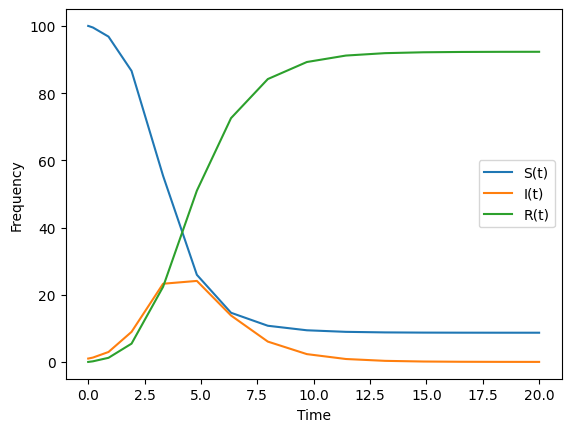

In [40]:
#--Extract solutions from the object called "solution"
times = solution.t
St    = solution.y[0,:] #<-first row  is S
It    = solution.y[1,:] #<-second row is I
Rt    = solution.y[2,:] #<-third row  is R

#--plot the results
plt.plot(times,St, label = "S(t)")
plt.plot(times,It, label = "I(t)")
plt.plot(times,Rt, label = "R(t)")

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend()

plt.show()

### Step Four: Optional (but useful) features of solve_ivp

If we do not ask for specific times of our solutions $S(t), I(t), R(t)$ then the `solve_ivp` function will return its own set of times. 
It will be useful to specify exactly what times you would like for states S,I,R. 
As an example, suppose we wish to return S,I,R at times startign at 0, stopping at 20 and then every 0.5 interval in between. 
We can use the following:

In [41]:
tvals = np.arange(start, end+0.1, 0.1)

new_solution = solve_ivp( fun     = sir
                     , t_span = (start,end)
                     , t_eval = tvals
                     , y0     = initial_conditions
                     , args   = (beta, gamma, n) )

To better understand how defining the time points at which to solve our ODE system, lets plot the number of infectors for the original solution and for this new solution at much smaller time intervals. 

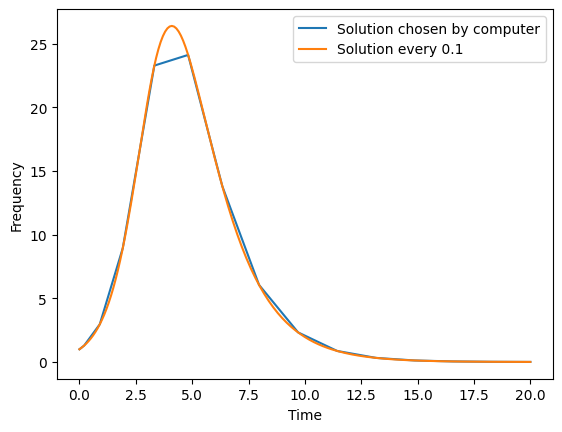

In [42]:
plt.plot(solution.t,solution.y[1,:], label="Solution chosen by computer")
plt.plot(new_solution.t,new_solution.y[1,:], label="Solution every 0.1")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

# HOMEWORK

## Problem 1

The **SIS model** assumes that individuals are in one of two states: susceptible or infectious and that the rates of change for s and i follow 

\begin{align}
    \frac{dS}{dt} &= -\beta S \frac{I}{N} + \gamma I \\ 
    \frac{dI}{dt} &=  \beta S \frac{I}{N} - \gamma I \\ 
\end{align}

That is, a certain fraction of infected individuals return to the susceptible state and are never removed.
Consider the initial conditions to be 100 susceptible and 1 infector from time 0 to time 20. 
Let $\beta = 2.0$ and $\gamma = 0.75$. 

Please write code to solve the SIS model and plot the number of susceptibles and number of infectors over time.
Please describe what you observe and why you think this is happening? 
Please find an infectious agent (Google is ok) that is often modeled with an SIS system. 

## Problem 2

The **SEIRS model** follows the below system of differential equations

\begin{align}
    \frac{dS}{dt} &= -\beta S \frac{I}{N} + \phi R  \\ 
    \frac{dE}{dt} &=  \beta S \frac{I}{N} - \sigma E \\ 
    \frac{dI}{dt} &=  \sigma E - \gamma I \\ 
    \frac{dR}{dt} &=  \gamma I - \phi R \\ 
     S(0)& = S_{0}; \; E(0) = E_{0} \\ 
     I(0)& = I_{0}; \; R(0) = R_{0} 
\end{align}

Consider the initial conditions:
S(0)=100, E(0)=1, I(0)=1, R(0)=0
and the parameter values 
beta = 4.0, gamma = 2.75, sigma = 3.0, phi = 1./15 

Estimate S,E,I,R from 0 to 20

Consider the initial conditions:
S(0)=100, I(0)=1, R(0)=0
and the parameter values 
beta = 4.0, gamma = 2.75 

Use the SIR model to estimate the states
Estimate S,I,R from 0 to 20

Plot the number of infectors from the SEIR system.
Plot the number of infectors from the SIR system.

Please describe the difference between the number of infectors in the SEIRS and SIR system. 
Why do you think there are differences in the trajectory of infectors?  

## Problem 3
You handed in an assignment during midterms that asked you to choose a pathogen and describe typical properties of how that pathogen behaves in the environment. Please find in the literature a traditional way that this pathogen is estimated using compartmental models. 
Build the compartmental model in the literature (or a simplified version) and use (if possible) parameters estimated from the literature. 